# Practice 4: About the 1D Gaussian Random Field 

## Course: "Métodos Estadísticos y Numéricos en Cosmología"

##### Rafael Morales Moreno, Maestría en Ciencias (Física), UNAM

The idea of this practice is to generate a **1D Gaussian Random Field** following a given power spectrum. You
will first generate various realizations from a same power spectrum. In a second time, you will use the same
random realization (i.e same seed) for distinct power spectra and see the difference.

## Ex. 1: Power spectra, 5 random realizations
- Create a 1D real space array in order to define your real space framework : between 0 and 10 with 10000 values.
- get the corresponding frequencies using np.fft.fftfreq() with the corresponding binning information (i.e., $dx$)
- Create a Power spectrum $P(k) = (|k| + \epsilon)^{-2}$ with  $\epsilon= 0.1 $

- Generate five random realizations of the Fourier coefficients $δ_k$, respecting the fact that the field is real.
- Do the inverse Fourier transform of the 5 realizations
- Plot the 5 realizations (5 arrays of $\delta_k$).
- Are they different? Do they look generating from a similar random process?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Defining 1D array
x_arr = np.linspace(0,10, 10000)

dx= 10/10000  # dx = 0.001

# Getting the frequencies
k_arr = np.fft.fftfreq(x_arr.shape[0], dx)

print(' kmin=', np.min(k_arr), '\n kmax=',np.max(k_arr), '\n', k_arr) # just in order to explicitly know them

 kmin= -500.0 
 kmax= 499.90000000000003 
 [ 0.   0.1  0.2 ... -0.3 -0.2 -0.1]


In [26]:
# k_arrshift = np.fft.fftshift(k_arr)      # **** IN CASE WE WANT THE ORDER -KMAX,-KMIN,0,KMIN, KMAX, but we DON'T
# k_arrshift     # in this case the term k=0 is placed in N/2 = 5000

array([-500. , -499.9, -499.8, ...,  499.7,  499.8,  499.9])

In [3]:
# Creating the PS for the defined k_arr

epsilon = 0.1
Pk = (np.abs(k_arr) + epsilon)**(-2)
Pk

array([100.        ,  25.        ,  11.11111111, ...,   6.25      ,
        11.11111111,  25.        ])

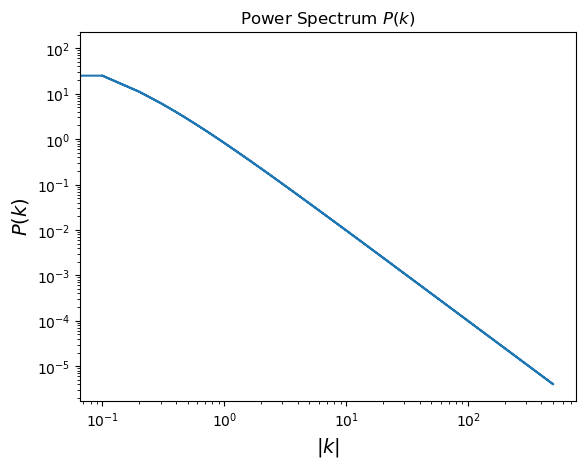

In [4]:
plt.loglog(np.abs(k_arr), Pk)
plt.title(r'Power Spectrum $P(k)$')
plt.xlabel('$|k|$', fontsize = 14)
plt.ylabel('$P(k)$', fontsize = 14)
plt.show()

In [46]:
# np.where(k_arr == 0)       # Making sure the term k=0 is in the position 0
# k_arr[0]

(array([0]),)

We know that, in 1D, a real GRF $\delta(r)$ is a central random fiel (mean 0) written as

$$
    \delta(r) = \sum_{-k_{max}}^{k_{max}} \delta_k e^{ik\cdot r} = \sum_{k_{min}}^{k_{max}} 2 \Re e \left( \delta_k e^{ik\cdot r} \right) + \delta_0,
$$

with $\delta_k$ the Fourier coefficients, $\delta_0 \in \mathbb{R}$, such that $\delta_k$ satisfies realness for the field $\delta(r)$ as

$$ \delta_{-k} = \delta_k^{*} $$.

Also, this Fourier coefficients (complex numbers in general) can be expressed in the polar form as

$$
    \delta_k = \alpha_k e^{i\phi_k},
$$

with $\alpha_k$ the module of the complex number computed as a random trial of the gaussian (normal) PDF ($\mathcal{N}(0,\sigma^2)$) with variance $P(k)$, and $\phi_k$ being the phase of this complex number, computed as a uniform random trial $\mathcal{U}\left( [0,2\pi] \right)$. Here, the phase also has to satisfy $\phi_{-k} = -\phi_k$.

In [5]:
# Generating five random realizations (understanding a realization as a random sampling with certain variance) 
# for the modules alpha_k of the Fourier coef. δ𝑘
N = Pk.shape[0]

# we take the square root bc np.random.normal ask for the std.dev. instead of var. as parameter
alpha_realization1 = np.random.normal(0.0, np.sqrt(Pk), size=N)
alpha_realization2 = np.random.normal(0.0, np.sqrt(Pk), size=N)
alpha_realization3 = np.random.normal(0.0, np.sqrt(Pk), size=N)
alpha_realization4 = np.random.normal(0.0, np.sqrt(Pk), size=N)
alpha_realization5 = np.random.normal(0.0, np.sqrt(Pk), size=N)

**Note:** Could be used **np.random.randn()** but it gives N(0,1), where if we want to get the non-unitary normal distr. we need to multiply for $k$.

This is bc $Y = \frac{x - \mu}{\sigma}$, with $\mu=0$ and $\sigma=1$ in this specific case, so $x=k$ is the multiplying factor.

In [6]:
for i in range(N//2):
    alpha_realization1[-i] = alpha_realization1[i]
    alpha_realization2[-i] = alpha_realization2[i]
    alpha_realization3[-i] = alpha_realization3[i]
    alpha_realization4[-i] = alpha_realization4[i]
    alpha_realization5[-i] = alpha_realization5[i]
print(alpha_realization1) # just to check format

[1.27846806 6.41770333 2.61922735 ... 3.08895362 2.61922735 6.41770333]


In [7]:
# Analogously for the phase values, but with uniform PDF, respecting the fact that the field has to be real

phase_realization1 = np.random.uniform(0, 2*np.pi, size=N)
phase_realization2 = np.random.uniform(0, 2*np.pi, size=N)
phase_realization3 = np.random.uniform(0, 2*np.pi, size=N)
phase_realization4 = np.random.uniform(0, 2*np.pi, size=N)
phase_realization5 = np.random.uniform(0, 2*np.pi, size=N)

for i in range(N//2):
    phase_realization1[-i] = -phase_realization1[i]
    phase_realization2[-i] = -phase_realization2[i]
    phase_realization3[-i] = -phase_realization3[i]
    phase_realization4[-i] = -phase_realization4[i]
    phase_realization5[-i] = -phase_realization5[i]

print(phase_realization1[189])
print(phase_realization1[-189]) # checking that actually are the negative from the other

0.5629121112816252
-0.5629121112816252


In [8]:
delta_k1 = alpha_realization1*np.exp(1j*phase_realization1)
delta_k2 = alpha_realization2*np.exp(1j*phase_realization2)
delta_k3 = alpha_realization3*np.exp(1j*phase_realization3)
delta_k4 = alpha_realization4*np.exp(1j*phase_realization4)
delta_k5 = alpha_realization5*np.exp(1j*phase_realization5)

In [9]:
# So, making sure that, indeed, the fields are the same under the realness condition

delta_k1[-17] == np.conj(delta_k1[17])

# delta_{-k} = (delta_k)* (for this we applied alpha_{-k} = alpha_k for the last N//2 terms)

True

In [10]:
# just in order to check if the format o the complex numbers is RECTANGULAR (i.e., z=a+ib) (AND IT ACTUALLY IS!!)

delta_k1

array([-1.21466907-0.3988228j , -6.05246278-2.13415331j,
        2.29226061+1.26723843j, ..., -0.25159865-3.07869008j,
        2.29226061-1.26723843j, -6.05246278+2.13415331j])

In [11]:
# for i in range(N//2):             # EVERYTHING COULD HAVE BE SIMPLIFIED SINCE THE BEGINNING WITH THIS SIMPLE LOOP
#     delta_k1[-i] = np.conj(delta_k1[i])

In [12]:
### Making the term k=0 real (in order to get a whole real field, bc exp{phi_k} for k=0 is 1)
# so, delta_{k=0} \in Real  (sustracting just the real part w/ np.real)
                       
delta_k1[0] = np.real(delta_k1[0]) # which is the same as make phase_realization1[0] = 0 in principle
delta_k2[0] = np.real(delta_k2[0])
delta_k3[0] = np.real(delta_k3[0])
delta_k4[0] = np.real(delta_k4[0])
delta_k5[0] = np.real(delta_k5[0])

In [13]:
# Taking the inverse FT of these realizations

real_GRF1 = np.fft.ifft(delta_k1)  # NOT taking '.real' part 
real_GRF2 = np.fft.ifft(delta_k2)
real_GRF3 = np.fft.ifft(delta_k3)
real_GRF4 = np.fft.ifft(delta_k4)
real_GRF5 = np.fft.ifft(delta_k5)

$\delta_k$ no es real, lo que debe ser real es $\delta_k \exp{(i k x)}$ (i.e., el resultado de ifft AUNQUE en la práctica no es exacto)

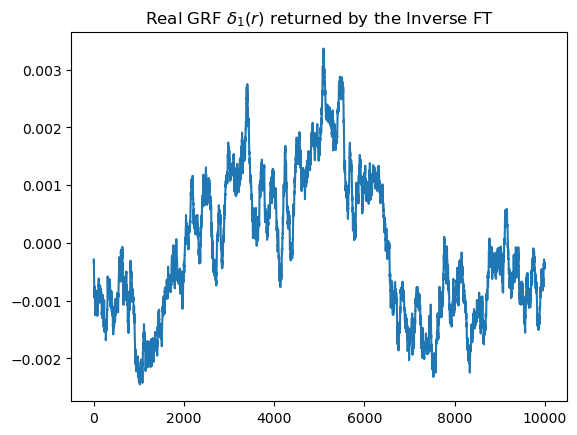

In [14]:
plt.plot(real_GRF1.real)
plt.title(r'Real GRF $\delta_1(r)$ returned by the Inverse FT')
plt.rcParams["figure.figsize"] = (7,5.5)
plt.show()

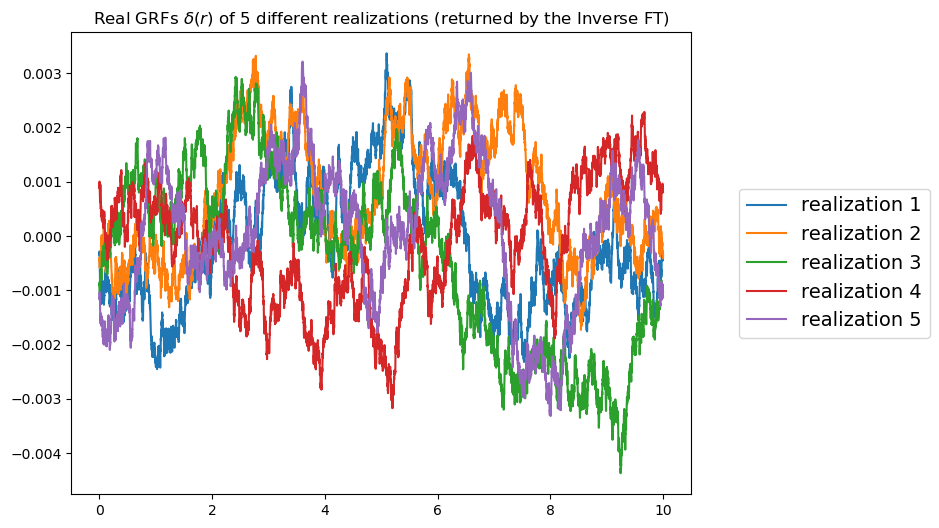

In [22]:
plt.plot(x_arr, real_GRF1.real, label=r'realization 1')  # *** Here '.real' has been removed too
plt.plot(x_arr, real_GRF2.real, label=r'realization 2')
plt.plot(x_arr, real_GRF3.real, label=r'realization 3')
plt.plot(x_arr, real_GRF4.real, label=r'realization 4')
plt.plot(x_arr, real_GRF5.real, label=r'realization 5')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize = 14)

plt.title(r'Real GRFs $\delta(r)$ of 5 different realizations (returned by the Inverse FT)')
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

## Ex. 2:  3 power spectra, 1 random realizations
- Create a 1D real space array in order to define your real space framework : between 0 and 10 with 1000 values.
- get the corresponding frequencies using np.fft.fftfreq() with the corresponding binning information
- Create a Power spectrum $P_2(k) = (|k| + \epsilon)^{−2}$, $P_3(k) = (|k| + \epsilon)^{−3}$ and $P_4(k) = (|k| + \epsilon)^{−4}$, with  $\epsilon= 0.001$
- Generate only one random realization you will use to generate the 3 series of the Fourier coefficients $δ_k$ (following P2(k), P3(k) and P4(k)), respecting the fact that the fields are real.
- Do the inverse Fourier transform of the 3 realizations
- Plot the 3 realizations.
- What can you conclude?


(3 tipos de pk (a la -2, -3 y -4)
por cada Pk la misma realización
espectro 1d de una misma realización

guardar los **mismos nums. aleat**)


guardar rand -> y multiplicarlo a cada Pk (el 1, 2, 3)


In [23]:
# Defining again an 1D array
x_arr2 = np.linspace(0,10, 1000)

dx2= 10/1000  # dx = 0.01

# Getting the frequencies
k_arr2 = np.fft.fftfreq(x_arr2.shape[0], dx2)
print('k_min=',np.min(k_arr2), '\n k_max=', np.max(k_arr2), '\n', k_arr2)

epsilon2 = 0.001
Pk_2 = (np.abs(k_arr2) + epsilon2)**(-2)
Pk_3 = (np.abs(k_arr2) + epsilon2)**(-3)
Pk_4 = (np.abs(k_arr2) + epsilon2)**(-4)

k_min= -50.0 
 k_max= 49.900000000000006 
 [  0.    0.1   0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.1
   1.2   1.3   1.4   1.5   1.6   1.7   1.8   1.9   2.    2.1   2.2   2.3
   2.4   2.5   2.6   2.7   2.8   2.9   3.    3.1   3.2   3.3   3.4   3.5
   3.6   3.7   3.8   3.9   4.    4.1   4.2   4.3   4.4   4.5   4.6   4.7
   4.8   4.9   5.    5.1   5.2   5.3   5.4   5.5   5.6   5.7   5.8   5.9
   6.    6.1   6.2   6.3   6.4   6.5   6.6   6.7   6.8   6.9   7.    7.1
   7.2   7.3   7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3
   8.4   8.5   8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5
   9.6   9.7   9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7
  10.8  10.9  11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9
  12.   12.1  12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.1
  13.2  13.3  13.4  13.5  13.6  13.7  13.8  13.9  14.   14.1  14.2  14.3
  14.4  14.5  14.6  14.7  14.8  14.9  15.   15.1  15.2  15.3  15.4  15.5
  15.6  

In [24]:
N2 = Pk_2.shape[0] # 1000

In [25]:
# Making a single random realization to generate the 3 series of the Fourier coef. δ𝑘
# (following P2(k), P3(k) and P4(k)), respecting the fact that the fields are real

alpha_realization_pk2 = np.random.normal(0.0, np.sqrt(Pk_2), size=Pk_2.shape) # just ONE but for each one (pk2, 3, 4)
alpha_realization_pk3 = np.random.normal(0.0, np.sqrt(Pk_3), size=Pk_3.shape)
alpha_realization_pk4 = np.random.normal(0.0, np.sqrt(Pk_4), size=Pk_4.shape)

for i in range(N2//2):
    alpha_realization_pk2[-i] = alpha_realization_pk2[i]
    alpha_realization_pk3[-i] = alpha_realization_pk3[i]
    alpha_realization_pk4[-i] = alpha_realization_pk4[i]

phase_realization_pk2 = np.random.uniform(0,2*np.pi, size=N2) # even when we know the shapes are the same
phase_realization_pk3 = np.random.uniform(0,2*np.pi, size=N2)
phase_realization_pk4 = np.random.uniform(0,2*np.pi, size=N2)

for i in range(N2//2):
    phase_realization_pk2[-i] = -phase_realization_pk2[i] # realness condition for the phase (phi_{-k} = -phi_k)
    phase_realization_pk3[-i] = -phase_realization_pk3[i]
    phase_realization_pk4[-i] = -phase_realization_pk4[i]

delta_k2_pk2 = alpha_realization_pk2*np.exp(1j*phase_realization_pk2)
delta_k3_pk3 = alpha_realization_pk3*np.exp(1j*phase_realization_pk3)
delta_k4_pk4 = alpha_realization_pk4*np.exp(1j*phase_realization_pk4)

In [26]:
print(delta_k2_pk2[-452])
print(np.conj(delta_k2_pk2[452])) # so, as they are the same they satisfy realness condition

(0.00677142065755656-0.013876023237535931j)
(0.00677142065755656-0.013876023237535931j)


In [27]:
# Finally, taking its k=0 -th term as real

delta_k2_pk2[0] = np.real(delta_k2_pk2[0])
delta_k3_pk3[0] = np.real(delta_k3_pk3[0])
delta_k4_pk4[0] = np.real(delta_k4_pk4[0])

In [28]:
# Taking the inverse FT of these realizations

real_GRF_pk2 = np.fft.ifft(delta_k2_pk2) # ***** QUITAR .real
real_GRF_pk3 = np.fft.ifft(delta_k3_pk3)
real_GRF_pk4 = np.fft.ifft(delta_k4_pk4)

### When verifying the resulting arrays for $\delta_k$ of Pk2, 3 & 4, it is observed that the term k=0 dominates over the rest. Thus, plotted together they appear to show no oscillation (plane curves previously reported in the old code).

### So, plotting them separately to see the precise scale, we see the following:

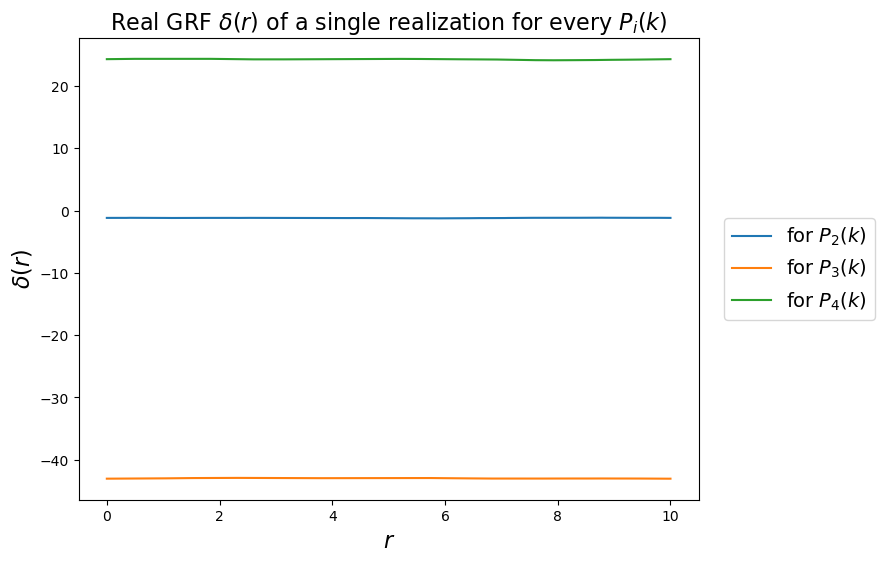

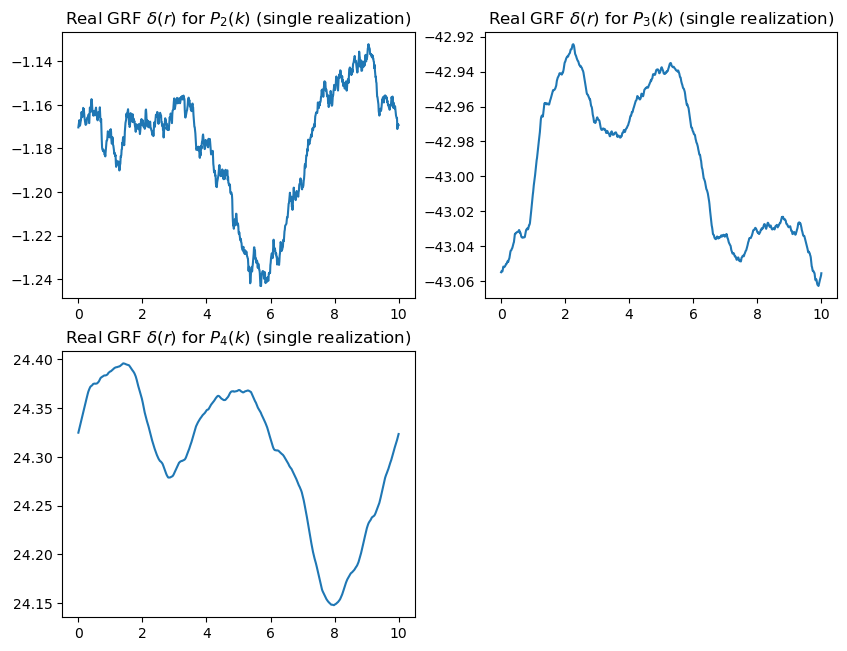

In [29]:
plt.plot(x_arr2, real_GRF_pk2.real, label=r'for $P_2(k)$')
plt.plot(x_arr2, real_GRF_pk3.real, label=r'for $P_3(k)$')
plt.plot(x_arr2, real_GRF_pk4.real, label=r'for $P_4(k)$')
plt.legend(loc='right',bbox_to_anchor=(1.3, 0.5), fontsize = 14)
plt.title(r'Real GRF $\delta(r)$ of a single realization for every $P_i(k)$', fontsize = 16)
plt.ylabel(r"$\delta(r)$", fontsize = 16)
plt.xlabel(r"$r$", fontsize = 16)
plt.rcParams["figure.figsize"] = (10,7.6)
plt.show()

# PLOTTING INDIVIDUALLY (initializing the subplot w/ num. of rows and cols.)

figure, axis = plt.subplots(2, 2)

axis[0, 0].plot(x_arr2, real_GRF_pk2.real)                                     # ***** QUITAR .real
axis[0, 0].set_title(r'Real GRF $\delta(r)$ for $P_2(k)$ (single realization)')

axis[0, 1].plot(x_arr2, real_GRF_pk3.real)
axis[0, 1].set_title(r'Real GRF $\delta(r)$ for $P_3(k)$ (single realization)')

axis[1, 0].plot(x_arr2, real_GRF_pk4.real)
axis[1, 0].set_title(r'Real GRF $\delta(r)$ for $P_4(k)$ (single realization)')

axis[-1, -1].axis('off')

# Combine all the operations and display
plt.show()

In [30]:
### So, suppressing the term k=0 (which is the max.)

print(np.where(np.max(delta_k2_pk2)))
print(np.where(np.max(delta_k3_pk3)))
print(np.where(np.max(delta_k4_pk4)))

delta_k2_pk2[0] = 0
delta_k3_pk3[0] = 0
delta_k4_pk4[0] = 0

(array([0]),)
(array([0]),)
(array([0]),)


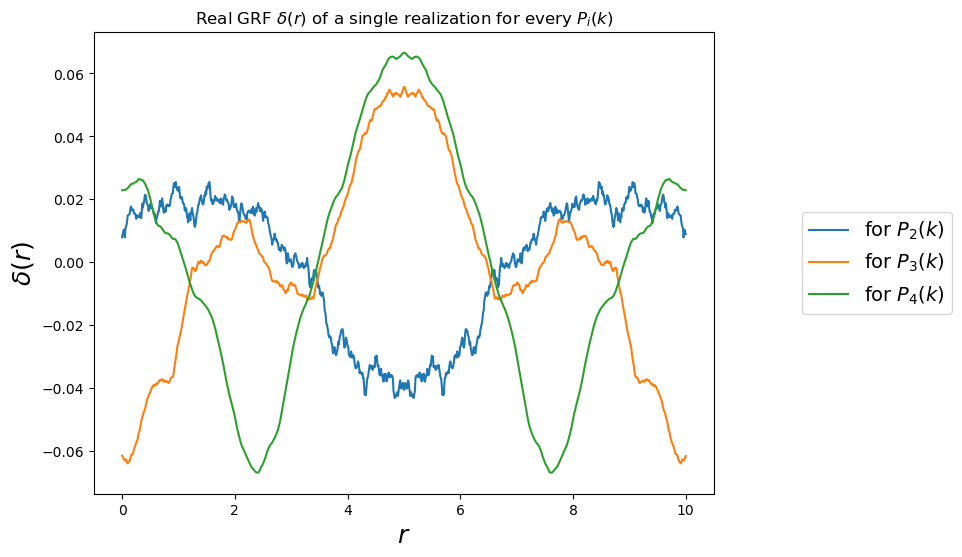

In [32]:
# Taking the inverse FT of these realizations

real_GRF_pk2 = np.fft.ifft(delta_k2_pk2.real) # ***** QUITAR .real
real_GRF_pk3 = np.fft.ifft(delta_k3_pk3.real)
real_GRF_pk4 = np.fft.ifft(delta_k4_pk4.real)

# PLOTTING ALL TOGHETER
plt.plot(x_arr2, real_GRF_pk2.real, label=r'for $P_2(k)$')    # ***** QUITAR .real
plt.plot(x_arr2, real_GRF_pk3.real, label=r'for $P_3(k)$')
plt.plot(x_arr2, real_GRF_pk4.real, label=r'for $P_4(k)$')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5), fontsize=14)
plt.title(r'Real GRF $\delta(r)$ of a single realization for every $P_i(k)$')
plt.ylabel(r"$\delta(r)$", fontsize=18)
plt.xlabel(r"$r$", fontsize=18)

plt.rcParams["figure.figsize"] = (8,6)
# plt.ylim(0,2)
plt.show()